# DIABETES

**Which health and Circumstantial factors influence the most on cases of diabetes and pre-diabetes?**

### Data Exploration

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
# Read the diabetes_012 file
file_path = '/Users/camillatartaglia/Desktop/UNIVERSITY/Data-Mining-I/Project/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_data = pd.read_csv(file_path)

# Basic information about the dataset
print(diabetes_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [29]:
# Display the first 5 rows of the dataset
print(diabetes_data.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [30]:
#CAMI
#in Diabetes_012 there are the categories 1 and 2 that explain 'having Diabetes' and 'pre-diabetes', so it could be useful to merge
#this two categories in one 

diabetes_data['Diabetes_012'] = diabetes_data['Diabetes_012'].apply(lambda x: '1.0' if x in [1.0, 2.0] else '0.0')
print(diabetes_data)


       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1               0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2               0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3               0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4               0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
253675          0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676          1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677          0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678          0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679          1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0         

In [31]:
print(diabetes_data.describe())


              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000  

First we have the variable **Diabetes_012**, with a mean of 0.429001 which suggest that about 42.9% of the dataset has some form of diabetes or pre-diabetes. 

Then we found a bunch of binary variables, since they have values 0 or 1. 

They are the following:
- **HighBP** (42.9% positive)
- **HighChol** (42.4% positive)
- **CholCheck** (96.3% positive)
- **Smoker** (44.3% positive)
- **Stroke** (4.1% positive)
- **HeartDiseaseorAttack** (9.4% positive)
- **PhysActivity** (75.7% positive)
- **AnyHealthcare** (95.1% positive)
- **NoDocbcCost** (8.4% positive)
- **DiffWalk** (16.8% positive)

On the other hand, we have the variable **BMI** (Body mass index), with a mean of 28.38. 
And from this variable we can see that the range (12 to 98) seems very wide, here we might want to check for potential outliers.

We have the variable **Age** with a mean of 8.03. Which might suggest us that it could be coded into categories, so we will have to check it out.

**Education** and **Income** also appear to be categorical variables, with ranges from 1 to 6 and 1 to 8, respectively.

Finally there are several Health Metrics, such as **GenHlth** with ranges from 1 to 5 (mean of 2.51), **MentHlth** and **PhysHlth** both range from 0 to 30, with means of 3.18 and 4.24 respectively.


#cami

**ADJUSTMENT OF THE TYPE OF VARIABLES**

because there are some variables that are categorial it's important to change their type from float to category

In [41]:
#changing the variables' type. Only BMI, MentHlth and PhysHlth are float. The remaing variables are category
# Convert all variables to 'category' if they are float64 or object
diabetes_data = diabetes_data.apply(lambda x: x.astype('category') if x.dtype in ['float64', 'object'] else x)

# Convert specific columns 'BMI', 'MentHlth', 'PhysHlth' back to 'float64'
diabetes_data[['BMI', 'MentHlth', 'PhysHlth']] = diabetes_data[['BMI', 'MentHlth', 'PhysHlth']].apply(lambda x: x.astype('float64'))

# Print the data types to verify the changes
print(diabetes_data.dtypes)


Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object


**CHECK NULL VALUES**

In [59]:
# Check for null values in each column
null_values = diabetes_data.isnull().sum()
print(null_values)


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


**SUMMARY STATISTICS**

In [47]:
# Get summary statistics for numerical variables
print(diabetes_data.describe())
# Get summary statistics for categorical variables
print(diabetes_data.describe(include='category'))


                 BMI       MentHlth       PhysHlth
count  253680.000000  253680.000000  253680.000000
mean       28.382364       3.184772       4.242081
std         6.608694       7.412847       8.717951
min        12.000000       0.000000       0.000000
25%        24.000000       0.000000       0.000000
50%        27.000000       0.000000       0.000000
75%        31.000000       2.000000       3.000000
max        98.000000      30.000000      30.000000
       Diabetes_012    HighBP  HighChol  CholCheck    Smoker    Stroke  \
count        253680  253680.0  253680.0   253680.0  253680.0  253680.0   
unique            2       2.0       2.0        2.0       2.0       2.0   
top             0.0       0.0       0.0        1.0       0.0       0.0   
freq         213703  144851.0  146089.0   244210.0  141257.0  243388.0   

        HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
count               253680.0      253680.0  253680.0  253680.0   
unique                   2.0          

Diabetes_012
0.0    84.24117
1.0    15.75883
Name: proportion, dtype: float64


/var/folders/6c/y8gs6wqx49bc4jr_jc8h7zg00000gn/T/ipykernel_63801/2454806903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relative_frequencies_diabetes_012.index, y=relative_frequencies_diabetes_012.values, palette='viridis')


Text(0, 0.5, 'Relative Frequency (%)')

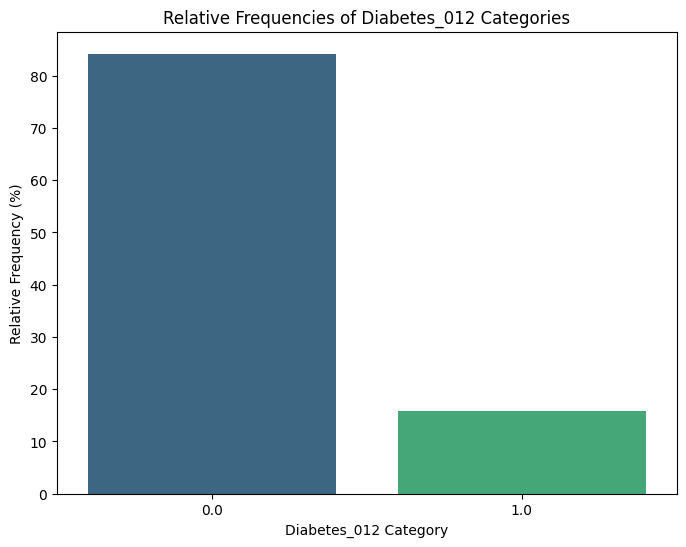

In [49]:
#now we want to analyze the TARGET variable (diabetes_012) and study its distribution 

relative_frequencies_diabetes_012 = diabetes_data['Diabetes_012'].value_counts(normalize=True) * 100
print(relative_frequencies_diabetes_012)

plt.figure(figsize=(8, 6))
sns.barplot(x=relative_frequencies_diabetes_012.index, y=relative_frequencies_diabetes_012.values, palette='viridis')

# Add titles and labels
plt.title('Relative Frequencies of Diabetes_012 Categories')
plt.xlabel('Diabetes_012 Category')
plt.ylabel('Relative Frequency (%)')


**EXPLORING RELATIONSHIPS BETWEEN CATEGORIAL VARIABLES**

                      Diabetes_012    HighBP  HighChol  CholCheck    Smoker  \
Diabetes_012                   NaN  0.270323  0.210279   0.067850  0.062767   
HighBP                    0.270323       NaN  0.298191   0.098487  0.096983   
HighChol                  0.210279  0.298191       NaN   0.085621  0.091291   
CholCheck                 0.067850  0.098487  0.085621        NaN  0.009908   
Smoker                    0.062767  0.096983  0.091291   0.009908       NaN   
Stroke                    0.104772  0.129555  0.092600   0.024105  0.061153   
HeartDiseaseorAttack      0.176915  0.209348  0.180752   0.044170  0.114428   
PhysActivity              0.121379  0.125258  0.078037   0.004165  0.087392   
Fruits                    0.042076  0.040546  0.040851   0.023828  0.077658   
Veggies                   0.059205  0.061256  0.039863   0.006094  0.030668   
HvyAlcoholConsump         0.056659  0.003954  0.011525   0.023685  0.101601   
AnyHealthcare             0.014054  0.038406  0.0422

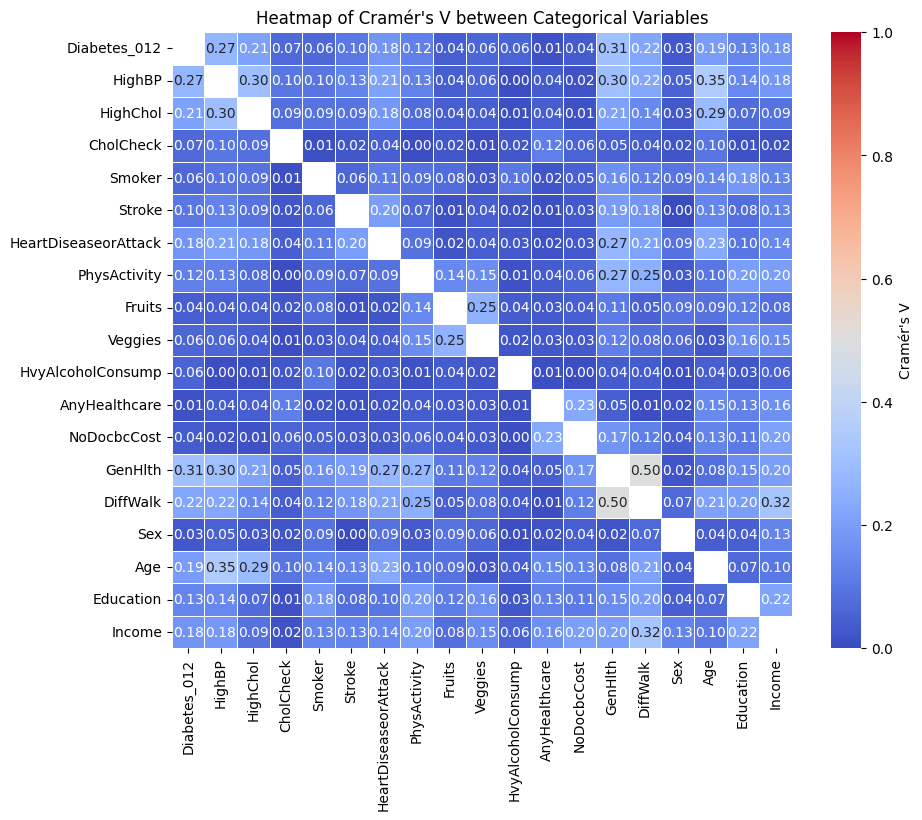

In [60]:

from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total number of observations
    r, k = contingency_table.shape     # Number of rows and columns
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# Select only categorical variables
categorical_vars = diabetes_data.select_dtypes(include='category').columns

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Loop over all pairs of categorical variables
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:  # Avoid diagonal (self comparison)
            # Create the contingency table
            cont_table = pd.crosstab(diabetes_data[var1], diabetes_data[var2])
            # Calculate Cramér's V
            cramers_v_matrix.loc[var1, var2] = cramers_v(cont_table)
        else:
            cramers_v_matrix.loc[var1, var2] = np.nan  # Set diagonal to NaN

# Convert the matrix to numeric
cramers_v_matrix = cramers_v_matrix.astype(float)
print(cramers_v_matrix)
# Plotting the heatmap of Cramér's V values
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt='.2f', cmap="coolwarm", cbar_kws={'label': "Cramér's V"}, vmin=0, vmax=1,linewidths=0.5)
plt.title("Heatmap of Cramér's V between Categorical Variables")
plt.show()


In [61]:
# Extract the row corresponding to 'Diabetes_012' from the Cramér's V matrix
cramers_v_with_target = cramers_v_matrix.loc['Diabetes_012'].abs().sort_values(ascending=False)

# Display the top 6 features most associated with 'Diabetes_012'
print("Top 6 features associated with Diabetes_012 based on Cramér's V:")
print(cramers_v_with_target[1:7])  # Skip the first (which is 'Diabetes_012' itself)

# Select the top 6 features (excluding 'Diabetes_012' itself)
top_features_v = cramers_v_with_target[1:7].index.tolist()

# Print the top features
print(f"Top 6 features: {top_features_v}")


Top 6 features associated with Diabetes_012 based on Cramér's V:
HighBP                  0.270323
DiffWalk                0.222140
HighChol                0.210279
Age                     0.193918
HeartDiseaseorAttack    0.176915
Income                  0.175113
Name: Diabetes_012, dtype: float64
Top 6 features: ['HighBP', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'Income']


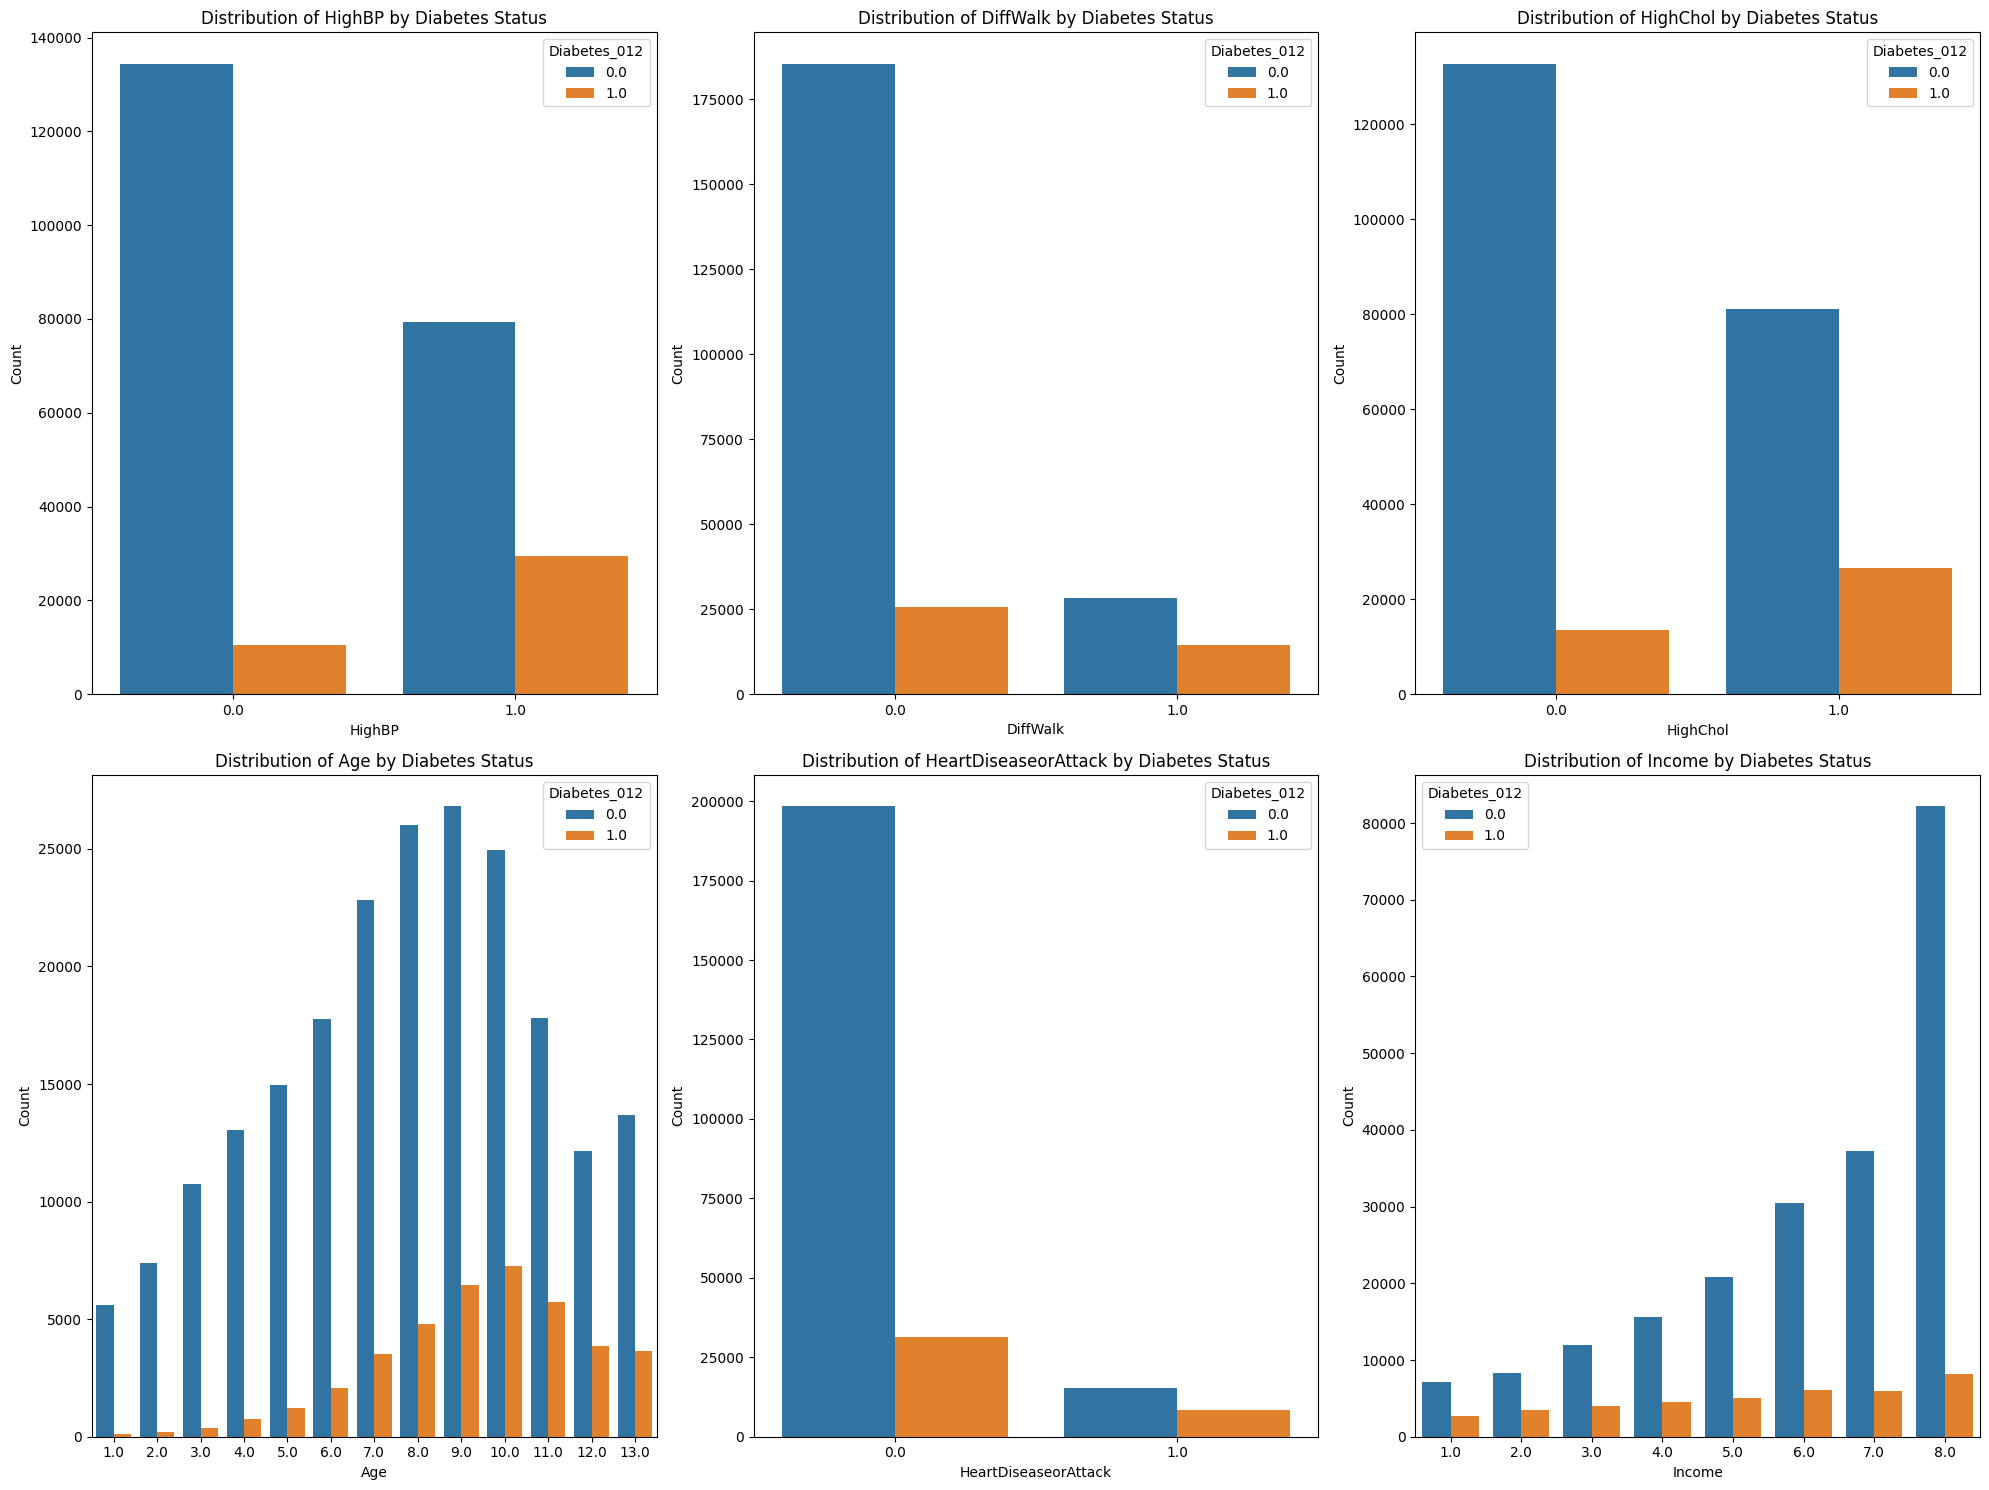

In [66]:

# Set up the matplotlib figure with a larger figure size to accommodate subplots
plt.figure(figsize=(20, 15))

# Create subplots for the top features (replace histograms with bar plots)
for i, feature in enumerate(top_features_v, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=diabetes_data, x=feature, hue='Diabetes_012')
    plt.title(f'Distribution of {feature} by Diabetes Status')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



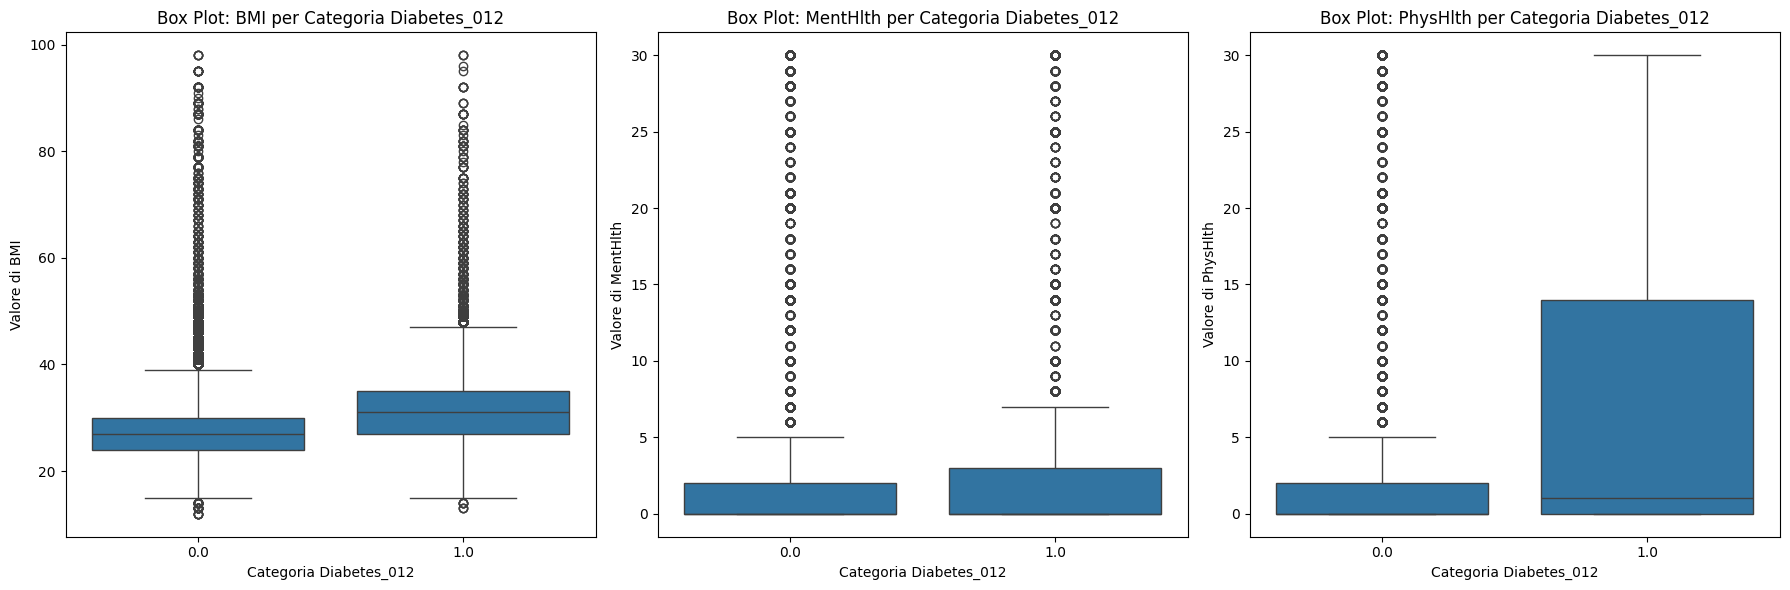

In [74]:
#analysis with numerical variables
numerical_vars = ['BMI', 'MentHlth', 'PhysHlth']
plt.figure(figsize=(18, 6))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)  # Crea una griglia 1x3 per i plot
    sns.boxplot(x='Diabetes_012', y=var, data=diabetes_data)
    plt.title(f'Box Plot: {var} per Categoria Diabetes_012')
    plt.xlabel('Categoria Diabetes_012')
    plt.ylabel(f'Valore di {var}')


plt.tight_layout()


plt.show()



**SCALING NUMERICAL VARIABLES**

In [77]:
from sklearn.preprocessing import MinMaxScaler
data_to_scale = diabetes_data[['BMI', 'MentHlth', 'PhysHlth']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_diabetes_data= pd.DataFrame(scaled_data, columns=['BMI', 'MentHlth', 'PhysHlth'])
display(scaled_diabetes_data)

,BMI,MentHlth,PhysHlth
0,0.325581,0.6,0.500000
1,0.151163,0.0,0.000000
2,0.186047,1.0,1.000000
3,0.174419,0.0,0.000000
4,0.139535,0.1,0.000000
...,...,...,...
253675,0.383721,0.0,0.166667
253676,0.069767,0.0,0.000000
253677,0.186047,0.0,0.000000
253678,0.127907,0.0,0.000000


**OUTLIERS**

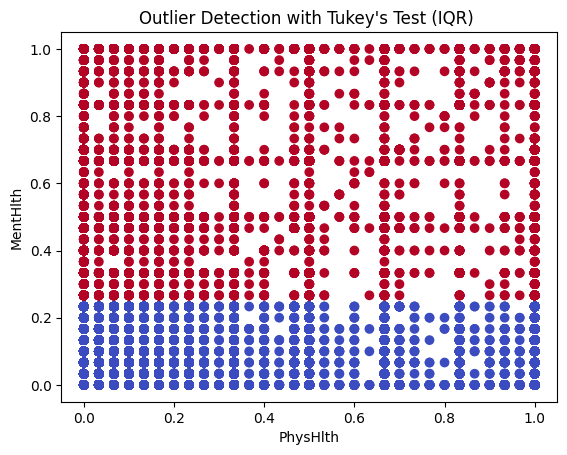

Outlier_Tukey_BMI          9847
Outlier_Tukey_MentHlth    36208
Outlier_Tukey_PhysHlth    40949
dtype: int64
Outliers in BMI: [85, 97, 156, 188, 201, 203, 216, 294, 321, 332, 355, 361, 369, 374, 389, 417, 426, 464, 478, 528, 532, 549, 556, 559, 584, 614, 657, 658, 670, 679, 686, 697, 736, 743, 756, 758, 769, 782, 815, 816, 835, 840, 853, 863, 895, 943, 948, 950, 952, 979, 987, 988, 1028, 1052, 1083, 1103, 1104, 1110, 1127, 1139, 1183, 1209, 1248, 1327, 1342, 1361, 1382, 1386, 1435, 1451, 1453, 1454, 1456, 1460, 1461, 1463, 1464, 1478, 1547, 1584, 1592, 1612, 1614, 1626, 1636, 1677, 1683, 1698, 1741, 1754, 1780, 1784, 1805, 1810, 1821, 1860, 1908, 1933, 1946, 1955, 1963, 1977, 1997, 1999, 2005, 2013, 2037, 2045, 2082, 2085, 2101, 2111, 2119, 2120, 2128, 2137, 2152, 2258, 2262, 2270, 2278, 2295, 2306, 2328, 2346, 2359, 2365, 2415, 2417, 2446, 2454, 2486, 2488, 2504, 2508, 2516, 2530, 2535, 2547, 2557, 2573, 2600, 2601, 2607, 2613, 2684, 2688, 2694, 2722, 2754, 2755, 2779, 2797, 2816, 282

,BMI,MentHlth,PhysHlth,Outlier_Tukey_BMI,Outlier_Tukey_MentHlth,Outlier_Tukey_PhysHlth
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.190493,0.106159,0.141403,0.038817,0.142731,0.161420
std,0.076845,0.247095,0.290598,0.193158,0.349799,0.367919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139535,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.174419,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.220930,0.066667,0.100000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# Function to apply Tukey's method for outlier detection
def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply Tukey's Test for each feature (pl, pw, sl, sw)
feature_columns = ['BMI', 'MentHlth', 'PhysHlth']

for col in feature_columns:
    scaled_diabetes_data[f'Outlier_Tukey_{col}'] = tukey_outliers(scaled_diabetes_data, col).astype(int)

# Visualize the outliers for one feature (e.g., pl and pw)
plt.scatter(scaled_diabetes_data['MentHlth'], scaled_diabetes_data['PhysHlth'], c=scaled_diabetes_data['Outlier_Tukey_PhysHlth'], cmap='coolwarm')
plt.xlabel('PhysHlth')
plt.ylabel('MentHlth')
plt.title('Outlier Detection with Tukey\'s Test (IQR) ')
plt.show()

# Count total outliers detected by Tukey's test for each feature
outlier_summary = scaled_diabetes_data[[f'Outlier_Tukey_{col}' for col in feature_columns]].sum()

# Display the count of outliers per feature
print(outlier_summary)
# Obtain the indices of outliers for each feature
outlier_indices = {}

for col in feature_columns:
    outliers = scaled_diabetes_data[scaled_diabetes_data[f'Outlier_Tukey_{col}'] == 1]
    outlier_indices[col] = outliers.index.tolist()

# Print the indices of the outliers for each feature
for feature, indices in outlier_indices.items():
    print(f"Outliers in {feature}: {indices}")

display(scaled_diabetes_data.describe())

In our case, the variables seem to represent physical health (PhysHlth) and mental health (MentHlth). If the outliers represent people with extremely poor or exceptionally good health conditions, removing the outliers could result in losing important information about a critical subset of the population. These individuals might be precisely those you are most interested in focusing on.  

**SCALED DATASET WITH ALL VARIABLES (NUMERICALS AND CATEGORIALS)**

In [82]:

scaled_diabetes_data = pd.concat([scaled_diabetes_data.drop(columns=['Outlier_Tukey_BMI','Outlier_Tukey_MentHlth',	'Outlier_Tukey_PhysHlth']), diabetes_data.drop(columns=['BMI', 'MentHlth', 'PhysHlth'])], axis=1)
display(scaled_diabetes_data)


,BMI,MentHlth,PhysHlth,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,0.325581,0.6,0.500000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0
1,0.151163,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.186047,1.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0
3,0.174419,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.139535,0.1,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.383721,0.0,0.166667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0
253676,0.069767,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0
253677,0.186047,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,0.127907,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0


#JORDI

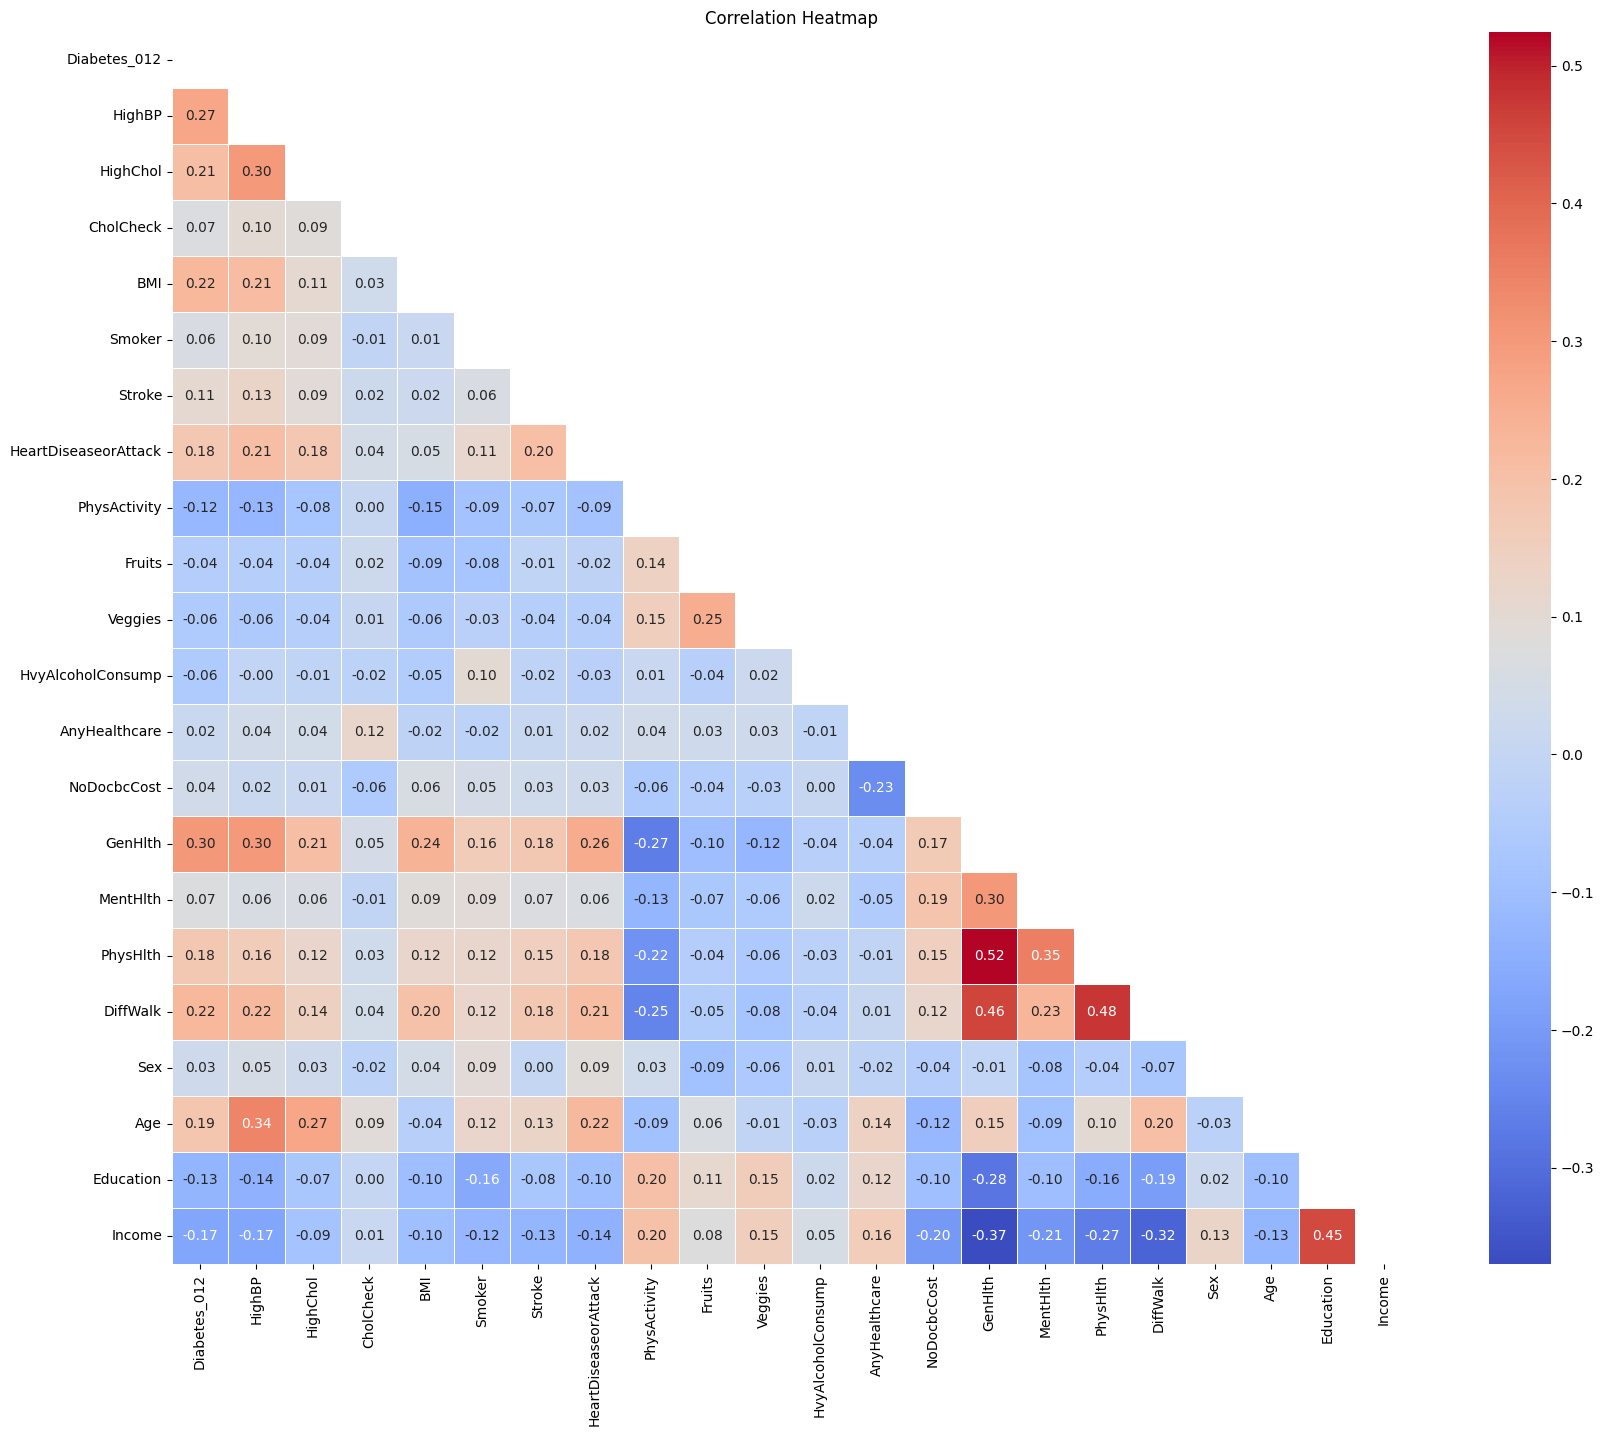

In [16]:
# Correlation heatmap
plt.figure(figsize=(20,16))
correlation = diabetes_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

-------

*Correlations with Diabetes_012*
- The strongest positive correlations are with:
    - GenHlth (0.30): General Health
    - HighBP (0.27): High Blood Pressure
    - BMI (0.22): Body Mass Index
    - HighChol (0.21): High Cholesterol
    - DiffWalk (0.22): Difficulty Walking
    - Age (0.19)

- The storngest negative correaltions are with:
    - Income (-0.17)
    - Education (-0.13)
    - PhysActivity (-0.12): Physical Activity


*Other notable correlations*
- PhysHlth and MentHlth have a strong positive correlation (0.52), suggesting a relationship between physical and mental health.
- Age has moderate positive correlations with HighBP (0.34) and HighChol (0.27).
- Education and Income have a moderate positive correlation (0.45).


*Variables with low correlations*
- Sex, HvyAlcoholConsump (Heavy Alcohol Consumption), and AnyHealthcare show relatively low correlations with most other variables, including Diabetes_012.


We can find several interesting patterns with this correlation map:
- Health-related variables (GenHlth, HighBP, BMI, HighChol) tend to have positive correlations with each other and with Diabetes_012.
- Lifestyle factors like PhysActivity and Income have negative correlations with Diabetes_012, suggesting they might be protective factors.
- Some variables show moderate correlations with each other (e.g., PhysHlth and GenHlth at 0.52), which might need to be considered in more complex analyses, to check if there is multicollinearity, which would be difficult to determine the individual effect of each variable on the outcome in the case there were correlated.


In [17]:
# Identify key features based on correlation with Diabetes_012
correlation_with_target = correlation['Diabetes_012'].abs().sort_values(ascending=False)
print("Top 6 features correlated with Diabetes_012:")
print(correlation_with_target[1:7])  # 7 to include Diabetes_012 itself

# Select top 6 correlated features (excluding Diabetes_012)
top_features = correlation_with_target[1:7].index.tolist()

negative_correlated = ["Education", "Income", "PhysActivity"]

Top 6 features correlated with Diabetes_012:
GenHlth     0.302587
HighBP      0.271596
BMI         0.224379
DiffWalk    0.224239
HighChol    0.209085
Age         0.185026
Name: Diabetes_012, dtype: float64


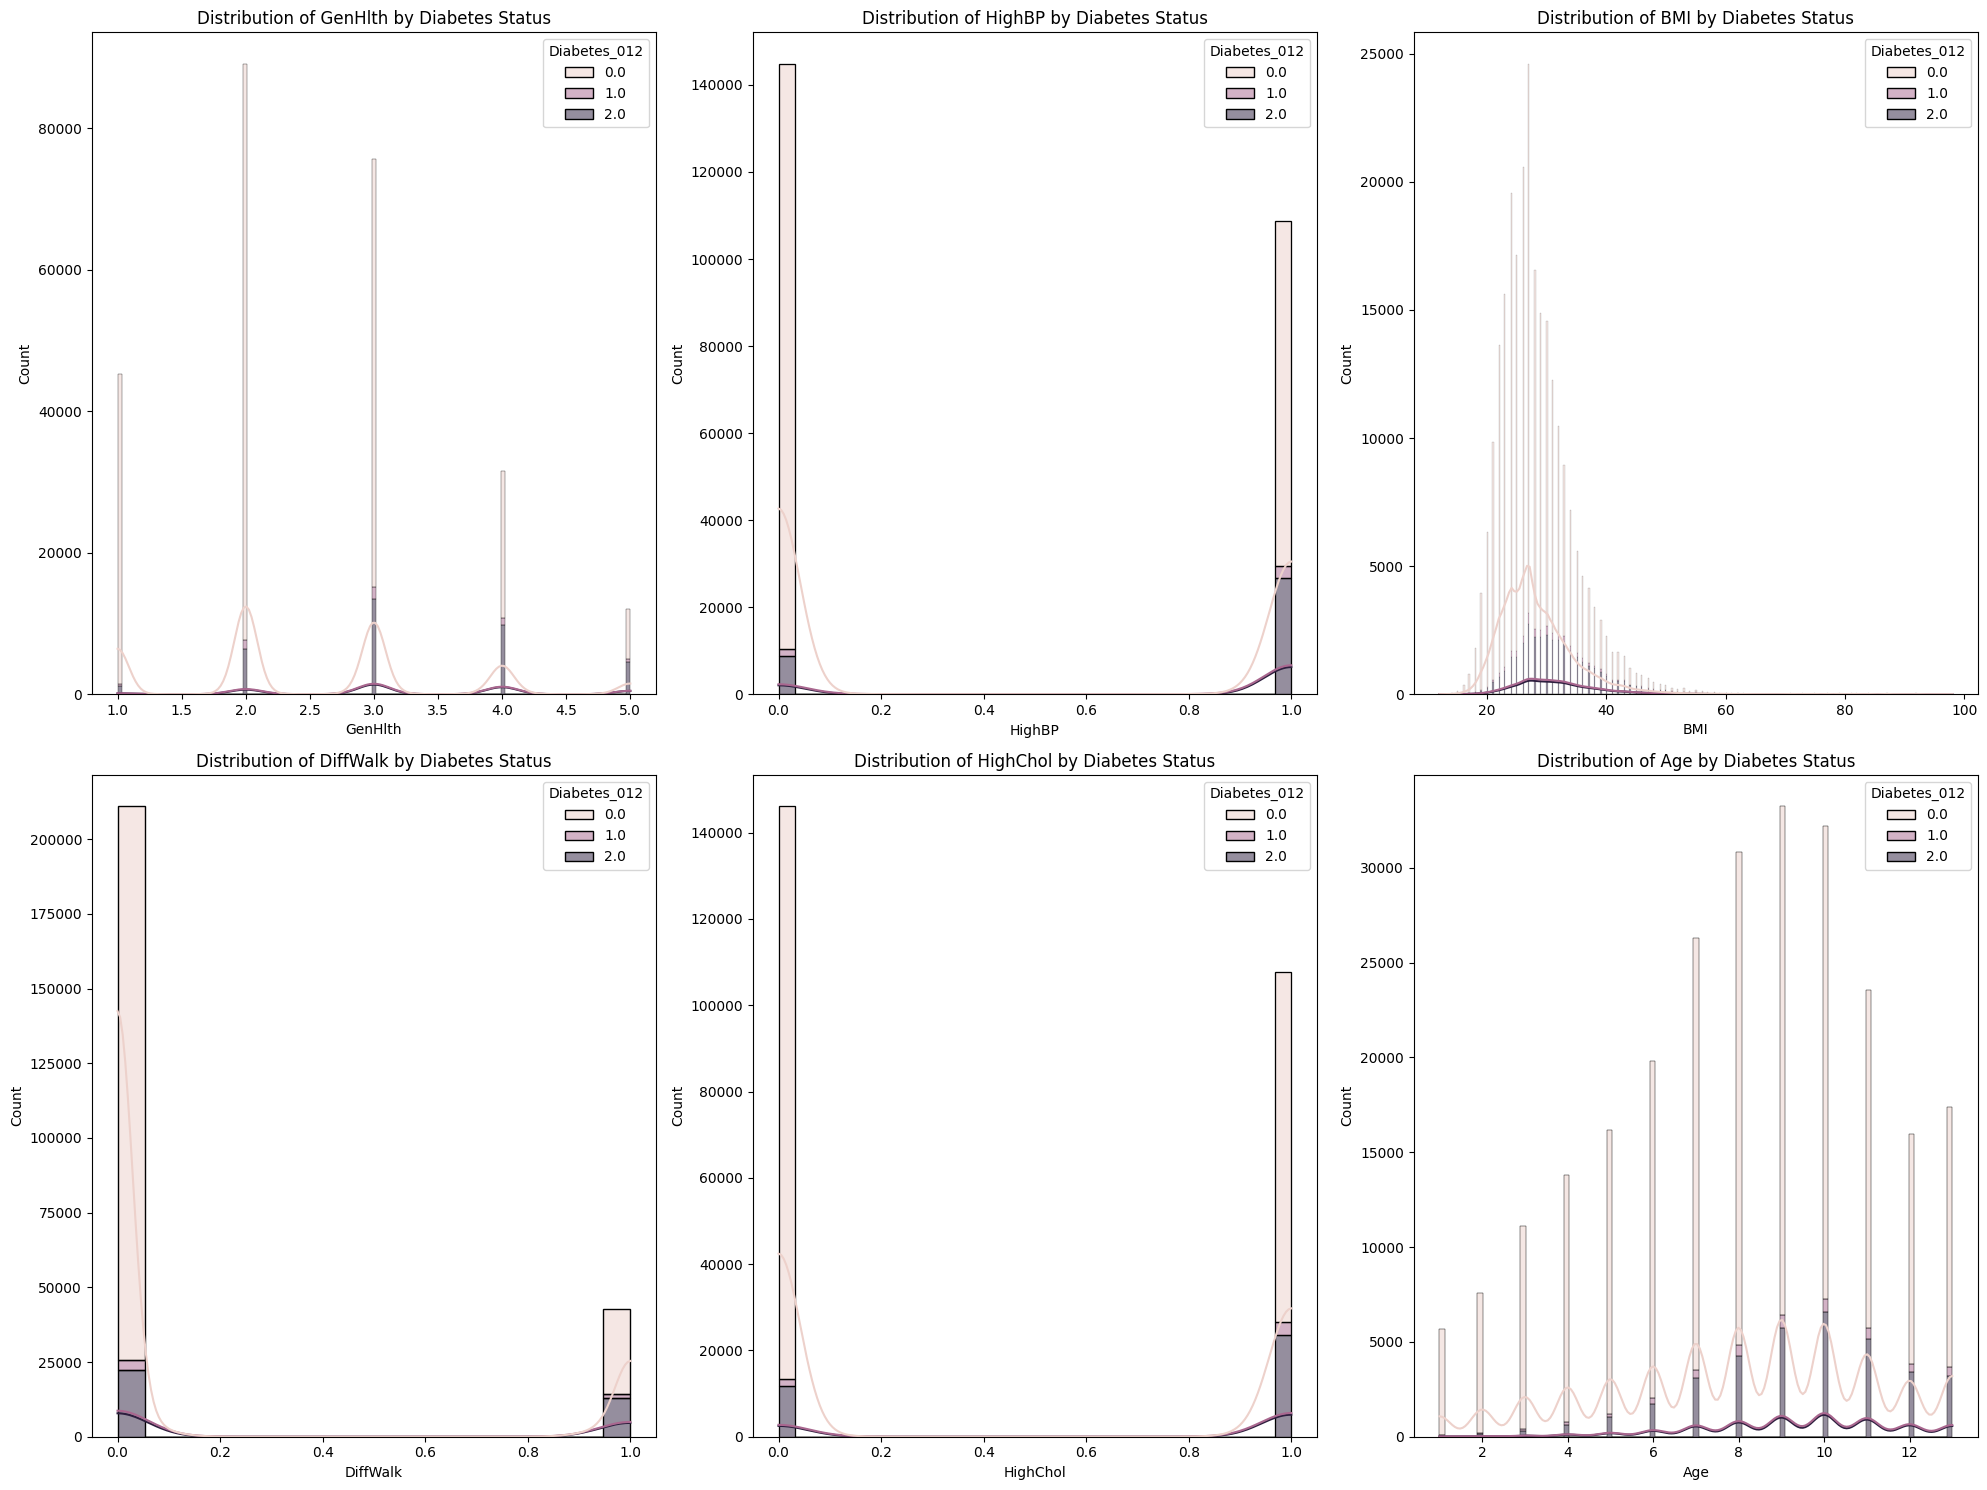

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create subplots for key features
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=diabetes_data, x=feature, hue='Diabetes_012', kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Diabetes Status')

plt.tight_layout()
plt.show()

In [19]:
# Create pairplot for top correlated features
plt.figure(figsize=(20, 20))
sns.pairplot(diabetes_data[top_features + ['Diabetes_012']], hue='Diabetes_012')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

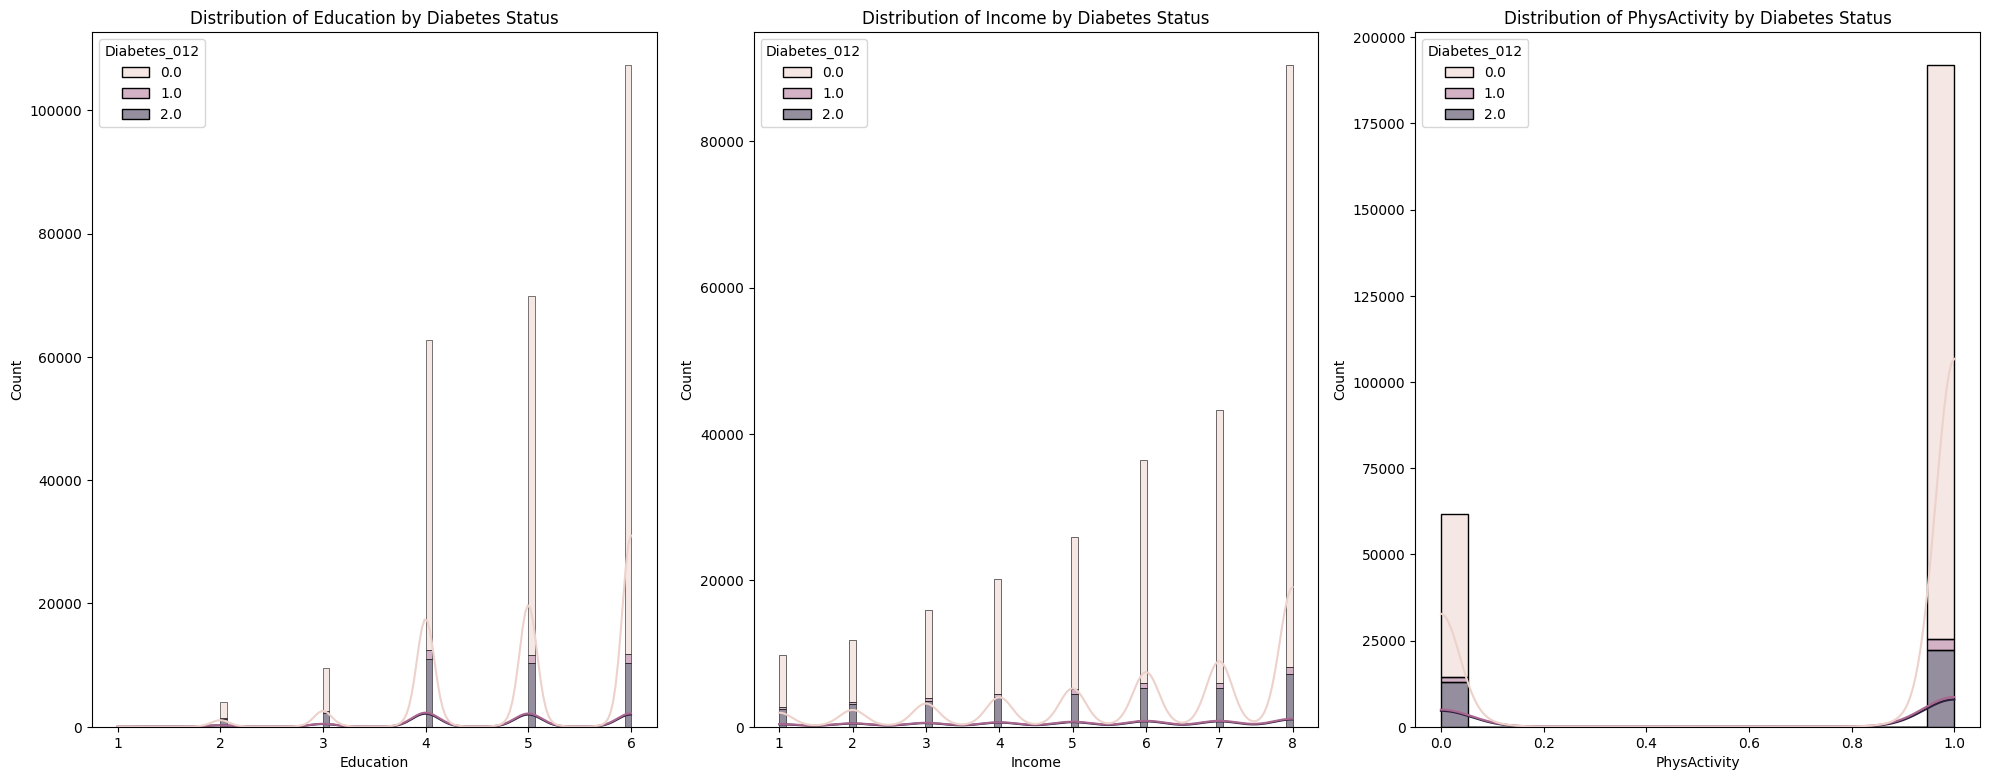

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create subplots for negative correlated features
for i, feature in enumerate(negative_correlated, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=diabetes_data, x=feature, hue='Diabetes_012', kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Diabetes Status')

plt.tight_layout()
plt.show()

In [13]:
# Check for missing values
print(diabetes_data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
